<a href="https://colab.research.google.com/github/ReidelVichot/DSTEP23/blob/main/week_12/dstep23_heatmaps_infographics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **DSTEP23 // Heatmaps and Infographics: Visualizing and Communicating DSNY Collection Data**

*November 14, 2023*

This notebook will create a heatmap calendar visualization of the collected refuse tonnage from DSNY as well as create a static infographic combining both temporal and spatial information in a visualization of the collected refuse tonnage from DSNY.

---

In [58]:
# -- import pandas, numpy, and matplotlib
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
import calendar

### Creating a Calendar-view Heatmap

In [59]:
# -- set the filename and read the data while parsing the MONTH column
fname = "https://data.cityofnewyork.us/api/views/ebb7-mvp5/rows.csv?accessType=DOWNLOAD"
dsny  = pd.read_csv(fname, parse_dates=["MONTH"])

# -- sub-select only the first six columns
cols = dsny.columns[:6]
dsny = dsny[cols]

# -- rename the columns for ease of use
dsny.columns = ["month", "borough", "district", "refuse", "paper", "mgp"]

# -- sub-select Brooklyn
bk = dsny[dsny["borough"] == "Brooklyn"].copy()

# -- sum across districts
bk_ts = bk.groupby("month").sum(numeric_only=True).reset_index()

# -- convert to tons per day
cols = ["refuse", "paper", "mgp"]
bk_ts[cols] = bk_ts[cols].divide(bk_ts["month"].dt.daysinmonth, axis=0)

In [60]:
bk_ts["month"].dt.month

0       1
1       2
2       3
3       4
4       5
       ..
390     7
391     8
392     9
393    10
394    11
Name: month, Length: 395, dtype: int64

In [61]:
bk

,month,borough,district,refuse,paper,mgp
22,1991-04-01,Brooklyn,11,5817.8,NaN,NaN
33,1991-05-01,Brooklyn,11,6242.6,NaN,NaN
35,1991-05-01,Brooklyn,01,2279.0,NaN,NaN
41,1991-06-01,Brooklyn,16,1140.9,NaN,NaN
47,1991-07-01,Brooklyn,09,3780.7,NaN,NaN
...,...,...,...,...,...,...
23282,2023-10-01,Brooklyn,07,3240.5,386.4,365.4
23285,2023-10-01,Brooklyn,10,3513.8,437.9,426.8
23292,2023-11-01,Brooklyn,07,703.4,79.2,80.0
23293,2023-11-01,Brooklyn,02,591.8,127.5,89.7


In [62]:
# -- add month and year columns
bk["jan2dec"] = bk["month"].dt.month
bk["year"] = bk["month"].dt.year

In [63]:
# -- group by year and month
bk_gr = bk.groupby(["jan2dec", "year"]).sum(numeric_only=True)

# -- unstack and select refuse to create a "grid"
bk_ustack = bk_gr.unstack("jan2dec")
bk_tgrid = bk_ustack["refuse"]

In [64]:
bk_tgrid

jan2dec,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1991,40.9,1604.0,22283.9,22696.4,34356.7,59021.3,83756.2,78192.3,75257.4,78479.8,74778.9,74840.8
1992,71870.0,67946.1,78594.3,80366.4,81322.3,85989.3,85149.4,80930.1,82182.6,81648.6,80935.8,83021.0
1993,75730.5,67172.1,80042.1,81982.1,78614.2,79311.2,74143.6,72507.6,73630.8,71422.9,75049.3,73574.7
1994,70174.1,59928.5,80308.1,75039.8,75551.2,79916.2,75033.2,77271.8,71485.7,70547.6,74873.5,73481.8
1995,68093.6,57274.5,68928.4,68515.8,76344.1,76756.4,73390.4,72194.2,68498.4,71560.5,72648.1,66498.5
1996,68973.1,61176.6,67821.6,74506.9,76426.6,73727.2,77799.6,75459.9,71284.4,75590.1,70701.6,73354.1
1997,67322.0,59464.5,66523.3,74372.0,75629.8,73051.5,74851.5,70775.3,72148.7,68987.8,66864.4,71276.9
1998,66037.8,58294.1,66658.7,69713.6,70767.9,73283.8,68603.0,65815.4,70001.8,68020.5,63626.1,67622.8
1999,62253.2,55531.7,68446.9,64499.1,66218.2,72940.3,66685.3,66502.5,69658.2,65918.6,67025.9,67880.3


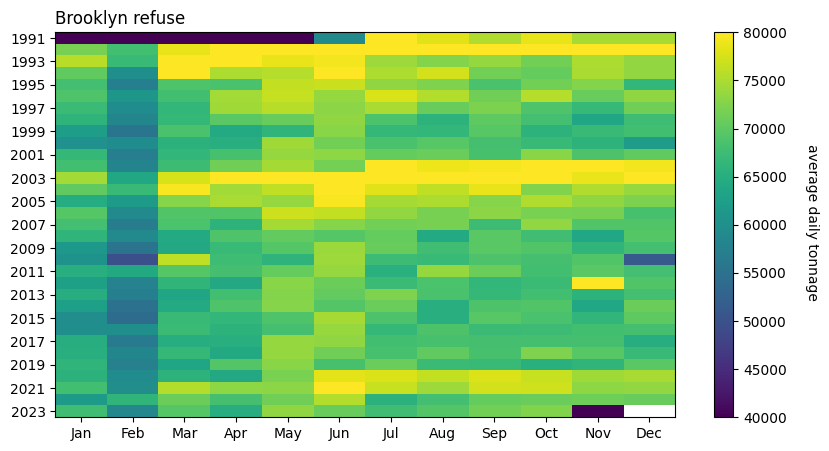

In [65]:
# -- creat a heatmap of the year and month
fig, ax = plt.subplots(figsize=(10, 5))

im = ax.imshow(bk_tgrid, aspect="auto", interpolation="nearest", vmin=40000, vmax=80000)
cbar = fig.colorbar(im)
clab = fig.text(0.875, 0.5, "average daily tonnage", rotation=-90, va="center")

xticks = ax.set_xticks(np.arange(12))
xtlabs = ax.set_xticklabels(calendar.month_abbr[1:])

yticks = ax.set_yticks(np.arange(len(bk_tgrid))[::2])
ytlabs = ax.set_yticklabels(bk_tgrid.index[::2])

ax.set_title("Brooklyn refuse", loc="left")
fig.show()

In [66]:
type(bk_tgrid.index)

pandas.core.indexes.numeric.Int64Index

In [67]:
list(range(5))[::2]

[0, 2, 4]

In [68]:
calendar.month_abbr[1:]

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

### Generating a Static Infographic from Spatiotemporal Data

In [ ]:
# -- read in the DSNY district shapes
sname = "https://data.cityofnewyork.us/api/geospatial/i6mn-amj2?method=export&format=GeoJSON"
dstshp = gp.read_file(sname)

In [70]:
# -- read the DSNY tonnage data
fname = "https://data.cityofnewyork.us/api/views/ebb7-mvp5/rows.csv?accessType=DOWNLOAD"
dsny  = pd.read_csv(fname, parse_dates=["MONTH"])

# -- sub-select only the first six columns
cols = dsny.columns[[0, 1, 2, 3, 4, 5, 10]]
dsny = dsny[cols]

# -- rename the columns for ease of use
dsny.columns = ["month", "borough", "district", "refuse", "paper", "mgp", "borough_id"]

# -- drop rows where borough_id is NaN
dsny = dsny.dropna(subset=["borough_id"])

<Axes: >

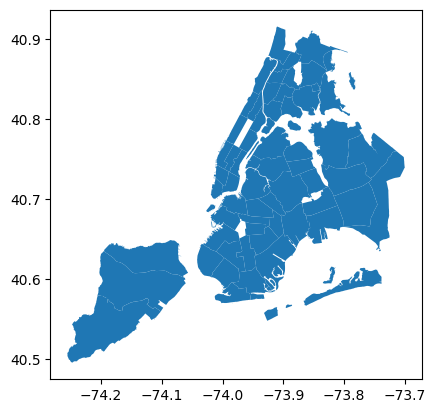

In [72]:
dstshp.plot()

In [73]:
# -- create a district code for merging
dsny["dcode"] = dsny["borough_id"].astype(int).astype(str) + dsny["district"]

In [74]:
dsny

,month,borough,district,refuse,paper,mgp,borough_id,dcode
0,1990-08-01,Manhattan,03,3258.3,NaN,NaN,1.0,103
1,1990-10-01,Manhattan,03,3829.9,NaN,NaN,1.0,103
2,1990-10-01,Staten Island,02,4379.5,NaN,NaN,5.0,502
3,1990-10-01,Manhattan,07,3463.6,NaN,NaN,1.0,107
4,1990-11-01,Manhattan,02,3014.2,NaN,NaN,1.0,102
...,...,...,...,...,...,...,...,...
23291,2023-11-01,Manhattan,08,925.8,216.3,150.1,1.0,108
23292,2023-11-01,Brooklyn,07,703.4,79.2,80.0,3.0,307
23293,2023-11-01,Brooklyn,02,591.8,127.5,89.7,3.0,302
23294,2023-11-01,Brooklyn,10,699.7,77.0,73.7,3.0,310


In [78]:
# -- get totals for each district
nyc_dtot = dsny.groupby('dcode').sum(numeric_only=True)["refuse"].reset_index()

In [ ]:
nyc_dtot

In [80]:
# -- merge with district shapes
dst_tot = dstshp.merge(nyc_dtot, left_on="districtcode", right_on="dcode")

<Axes: >

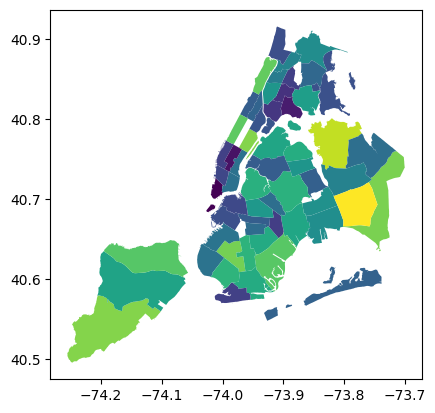

In [82]:
dst_tot.plot("refuse")

In [85]:
# -- change units of collection data
dst_tot["refuse1000"] = dst_tot["refuse"] / 1000.

# -- create a time series of total collection
dsny_ts = dsny.groupby("month").sum(numeric_only=True)

# -- sub-select the time range
dsny_ts = dsny_ts[(dsny_ts.index > "1993-01-01") & (dsny_ts.index < "2020-01-01")]

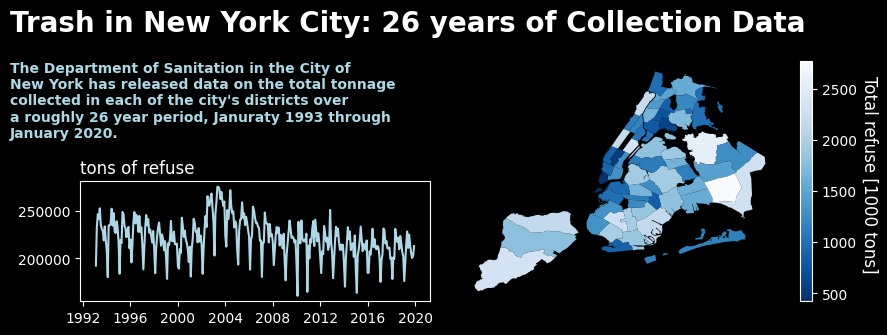

In [102]:
# -- now visualize
plt.style.use("dark_background")

fig = plt.figure(figsize=(10, 3))
ax = fig.add_axes([0.5, 0.05, 0.4, 0.8])
dst_tot.plot("refuse1000", cmap="Blues_r", legend=True, ax=ax)
ax.axis("equal")
ax.axis("off")

ax2 = fig.add_axes([0.12, 0.05, 0.35, 0.4])
ax2.plot(dsny_ts.index, dsny_ts["refuse"], color="lightblue")
ax2.set_xlabel("")
ax2.set_title("tons of refuse", loc="left")

cbt = fig.text(0.9, 0.475, "Total refuse [1000 tons]", rotation=-90, fontsize=12, va="center", color="white")
header = fig.text(0.05, 0.95, "Trash in New York City: 26 years of Collection Data", fontsize=20, color="w", weight="bold")
subheader =  fig.text(0.05, 0.85, "The Department of Sanitation in the City of \nNew York " +
                      "has released data on the total tonnage \ncollected in each " +
                      "of the city's districts over \na roughly 26 year period, "+
                      "Januraty 1993 through \nJanuary 2020.", color="lightblue", weight="bold", va="top")

fig.show()
